### <font>IMPORTING THE LIBRARIES</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
#!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')


### <font >CALLING THE DATA FILE</font>

In [4]:
file=pd.read_csv('creditcard.csv')

### UNDERSTANDING THE DATA

In [5]:
file.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### CHECKING FOR NULL VALUES

In [6]:
file.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

 <font color=brown>**COMMENT:**</font> <font>*There is no missing values in the dataframe*</font> 

#### DESCRIBING THE DATA

In [7]:
file.shape

(284807, 31)

 <font color=brown>**COMMENT:**</font> <font>*The data contains 31 columns and 284807 datapoints.*</font> 

In [8]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
print(file.describe())
###print(file.describe().iloc(:,0:5))

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.23709

### VISUALIZING EVERY COLUMN OF THE DATA
In this section, I'll visualize every column of the dataset with respect to <font color=blue> **Class**</font> Column. There are 2 classes in this dataset.
1. Class=1 which denotes <font color=blue>Fraudulent Transactions</font>
2. Class=0 which denotes <font color=blue>Original Transactions</font>

I'll draw Histogram and Boxplot of every columns for this 2 classes to fulfill my purpose.


In [10]:
#extracting the dataset corresponding to class=1
fr=(file[file['Class']==1])
#extracting the dataset corresponding to class=0
real=(file[file['Class']==0])

#### COLUMN 1: Time

Skewness for fraudulent transactions: 0.25040691681884886
Skewness  for original transactions: -0.03601527418606764
Kurtosis  for fraudulent transactions: -1.1552998146944484
Kurtosis  for original transactions: -1.2935955464772317


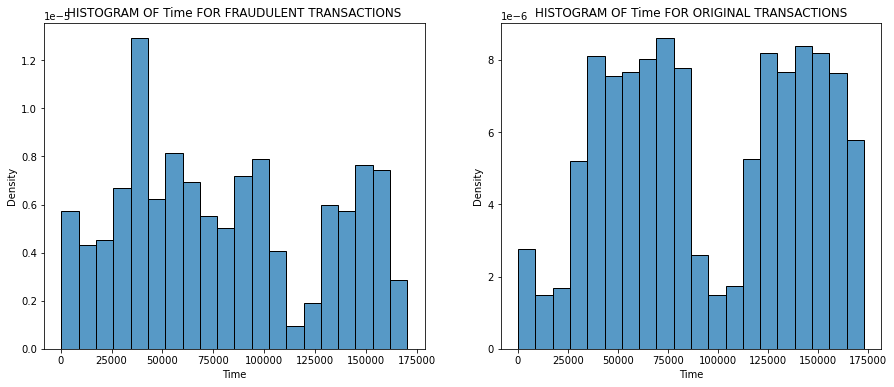

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='Time',data=fr,stat='density',bins=20,ax=ax1)
sns.histplot(x='Time',data=real,stat='density',bins=20,ax=ax2)
ax1.set_title('HISTOGRAM OF Time FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF Time FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.Time))
print('Skewness  for original transactions:',stats.skew(real.Time))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.Time))
print('Kurtosis  for original transactions:',stats.kurtosis(real.Time))


Text(0.5, 1.0, 'BOXPLOT OF Time W.R.T. CLASS')

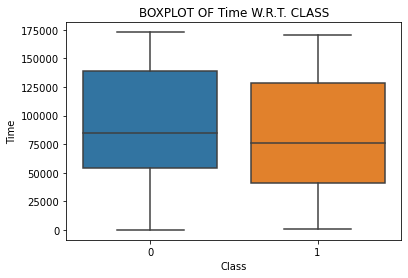

In [12]:
p1=sns.boxplot(x='Class',y='Time',data=file)
p1.set_title('BOXPLOT OF Time W.R.T. CLASS')

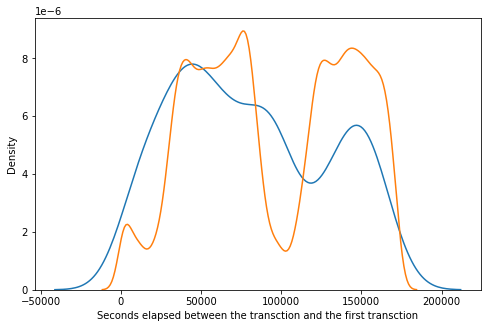

In [106]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(fr['Time'],label='fraudulent',hist=False)
ax = sns.distplot(real['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

<font color=brown>**INTERPRETATION**</font>
* We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. 

#### 2ND COLUMN: V1

Skewness for fraudulent transactions: -1.7921313955133558
Skewness  for original transactions: -3.130171747665366
Kurtosis  for fraudulent transactions: 2.8382570389212427
Kurtosis  for original transactions: 31.065000867864455


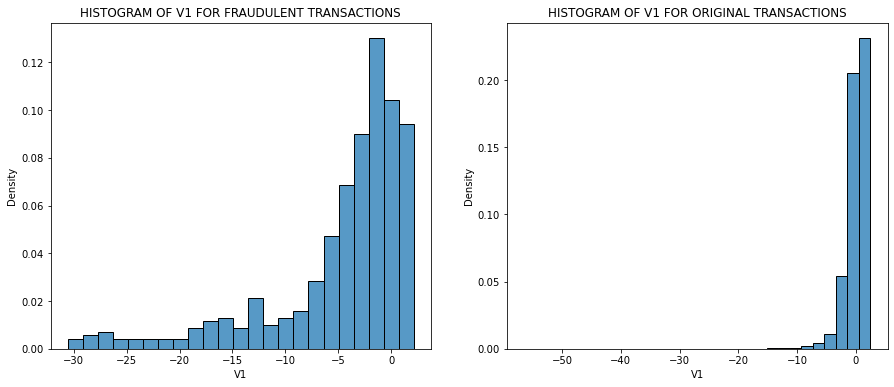

In [13]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V1',data=fr,stat='density',ax=ax1)
sns.histplot(x='V1',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V1 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V1 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V1))
print('Skewness  for original transactions:',stats.skew(real.V1))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V1))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V1))

Text(0.5, 1.0, 'BOXPLOT OF V1 W.R.T. CLASS')

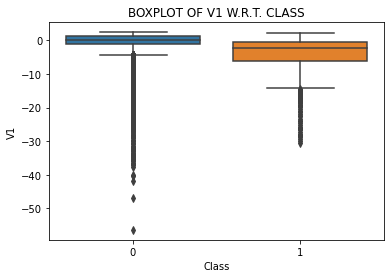

In [14]:
p1=sns.boxplot(x='Class',y='V1',data=file)
p1.set_title('BOXPLOT OF V1 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V1 takes many negative values for class 1 and takes values around 0 for class 0
   2. V1 has higher variance for class 1 than for class 0
   3. V1 is more peaked and negatively skewed for class 0 than for class 1
   4. V1 has more outlier values for class 0 than class 1.
    

#### 3RD COLUMN:V2

Skewness for fraudulent transactions: 1.2228179789510243
Skewness  for original transactions: -4.887139945176386
Kurtosis  for fraudulent transactions: 2.5590698244468433
Kurtosis  for original transactions: 98.40445898585224


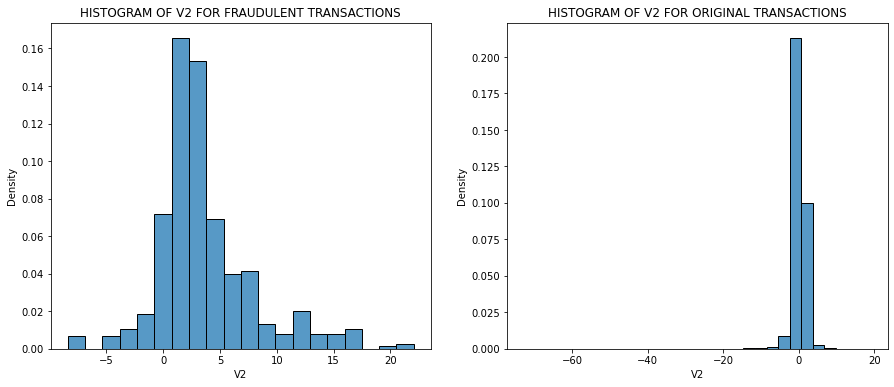

In [15]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V2',data=fr,stat='density',bins=20,ax=ax1)
sns.histplot(x='V2',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V2 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V2 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V2))
print('Skewness  for original transactions:',stats.skew(real.V2))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V2))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V2))


Text(0.5, 1.0, 'BOXPLOT OF V2 W.R.T. CLASS')

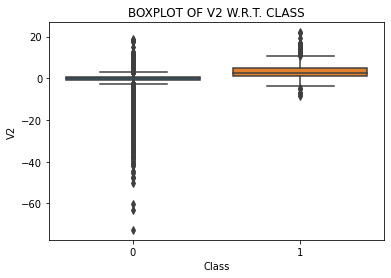

In [16]:
p1=sns.boxplot(x='Class',y='V2',data=file)
p1.set_title('BOXPLOT OF V2 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V2 takes values from -5 to 15 for class 1 and takes values around 0 for class 0
   2. V2 has higher variance for class 1 than for class 0
   3. V2 is more peaked for class 0 than for class 1. Also, V2 is negatively skewed for class 0 whereas positively skewed for class 1.
   4. V2 has more outlier values for class 0 than class 1.

#### 4TH COLUMN:V3

Skewness for fraudulent transactions: -1.510362130741656
Skewness  for original transactions: -1.453668675575384
Kurtosis  for fraudulent transactions: 1.7507853430414464
Kurtosis  for original transactions: 14.545068026719829


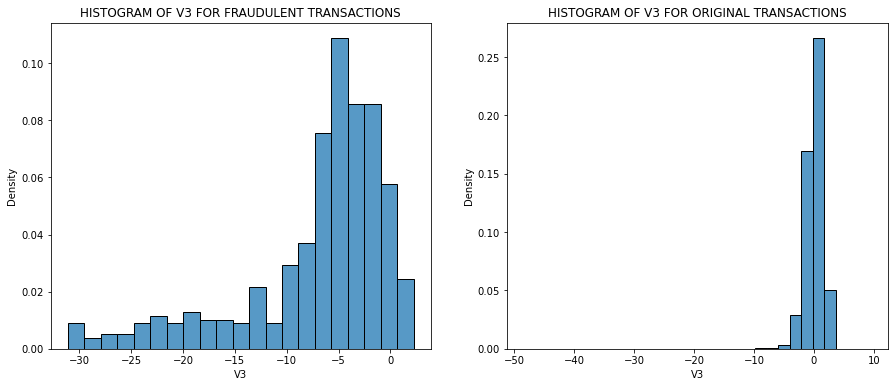

In [17]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V3',data=fr,stat='density',ax=ax1)
sns.histplot(x='V3',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V3 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V3 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V3))
print('Skewness  for original transactions:',stats.skew(real.V3))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V3))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V3))


Text(0.5, 1.0, 'BOXPLOT OF V3 W.R.T. CLASS')

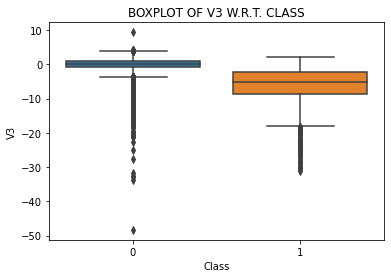

In [18]:
p1=sns.boxplot(x='Class',y='V3',data=file)
p1.set_title('BOXPLOT OF V3 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V3 takes values from -30 to 1 for class 1 and takes values around 0 for class 0
   2. V3 has higher variance for class 1 than for class 0
   3. V3 is more peaked for class 0 than for class 1 . The skewness is negative and almost same for both classes.
   4. V3 has more outlier values for class 0 than class 1.

#### 5TH COLUMN:V4

Skewness for fraudulent transactions: 0.495229769280999
Skewness  for original transactions: 0.5811344075820191
Kurtosis  for fraudulent transactions: -0.20766182343199224
Kurtosis  for original transactions: 2.0956579410508596


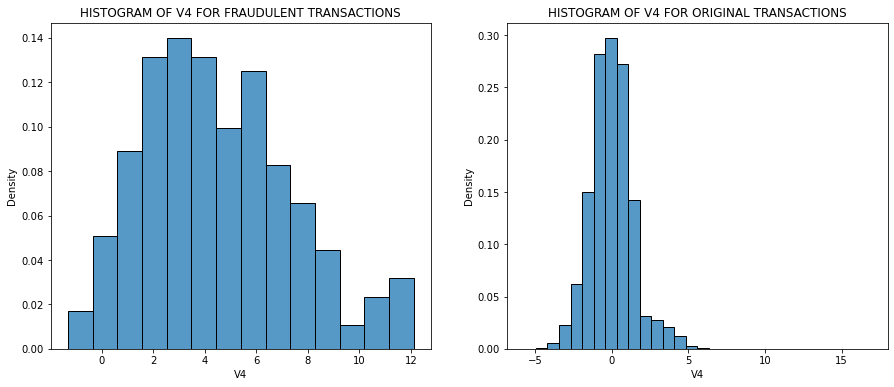

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V4',data=fr,stat='density',ax=ax1)
sns.histplot(x='V4',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V4 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V4 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V4))
print('Skewness  for original transactions:',stats.skew(real.V4))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V4))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V4))


Text(0.5, 1.0, 'BOXPLOT OF V4 W.R.T. CLASS')

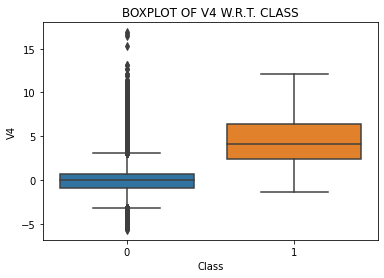

In [20]:
p1=sns.boxplot(x='Class',y='V4',data=file)
p1.set_title('BOXPLOT OF V4 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V4 takes values -1 to 12 for class 1 and takes values from -5 to 5 for class 0
   2. V4 has higher variance for class 1 than for class 0
   3. V4 is more peaked for class 0 than for class 1.V4 is slightly positively skewed and and the value of the skewness is almost same for both classes.
   4. V4 has a large no. of outlier values for class 0 whereas it doesn't contain any outlier value for class 1.
    

#### 6TH COLUMN:V5

Skewness for fraudulent transactions: -1.35698590358671
Skewness  for original transactions: -2.2138918046762903
Kurtosis  for fraudulent transactions: 1.6991414718675415
Kurtosis  for original transactions: 217.84831745453806


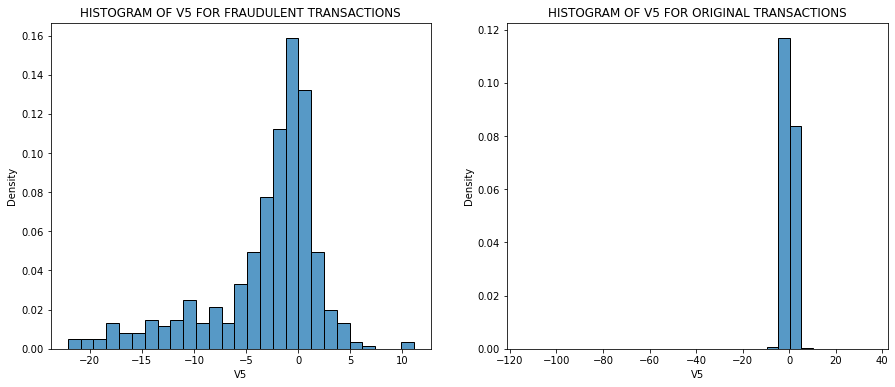

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V5',data=fr,stat='density',ax=ax1)
sns.histplot(x='V5',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V5 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V5 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V5))
print('Skewness  for original transactions:',stats.skew(real.V5))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V5))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V5))


Text(0.5, 1.0, 'BOXPLOT OF V5 W.R.T. CLASS')

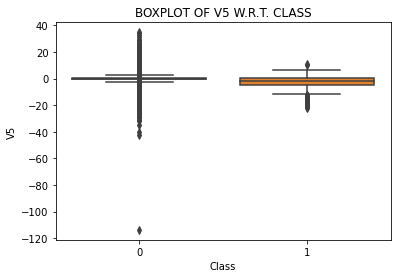

In [22]:
p1=sns.boxplot(x='Class',y='V5',data=file)
p1.set_title('BOXPLOT OF V5 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V5 takes values from -20 to 10 for class 1 and takes values around 0 for class 0
   2. V5 has higher variance for class 1 than for class 0
   3. V5 is more peaked for class 0 than for class 1 . It is more negatively skewed for class 0 than class 1.
   4. V5 has more outlier values for class 0 than class 1.

#### 7TH COLUMN:V6

Skewness for fraudulent transactions: 0.865085969988708
Skewness  for original transactions: 1.8425937997370527
Kurtosis  for fraudulent transactions: 2.8347519738101736
Kurtosis  for original transactions: 42.986756501690714


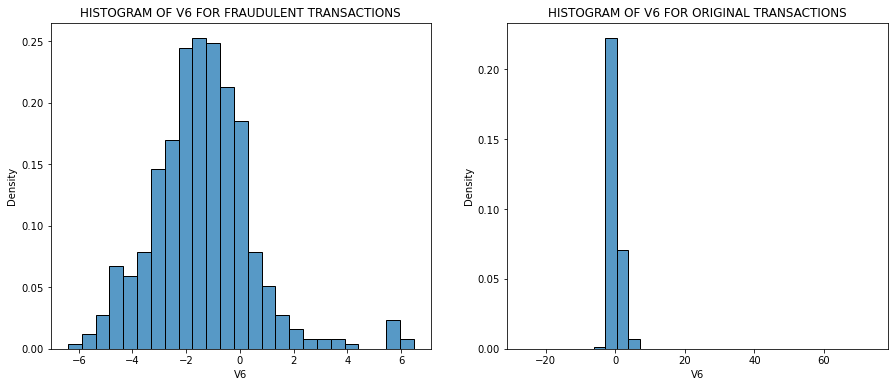

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V6',data=fr,stat='density',ax=ax1)
sns.histplot(x='V6',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V6 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V6 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V6))
print('Skewness  for original transactions:',stats.skew(real.V6))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V6))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V6))


Text(0.5, 1.0, 'BOXPLOT OF V6 W.R.T. CLASS')

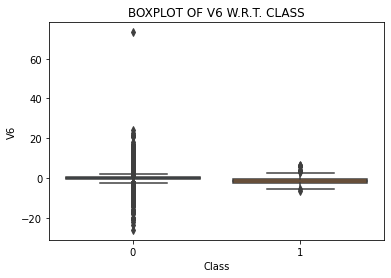

In [24]:
p1=sns.boxplot(x='Class',y='V6',data=file)
p1.set_title('BOXPLOT OF V6 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V6 takes values from -6 to 6 for class 1 and takes values around 0 for class 0.
   2. V6 has higher variance for class 1 than for class 0.
   3. V6 is more peaked and more positively skewed for class 0 than for class 1.
   4. V6 has more outlier values for class 0 than class 1.

#### 8TH COLUMN:V7

Skewness for fraudulent transactions: -1.8220227663171338
Skewness  for original transactions: 4.747775402532157
Kurtosis  for fraudulent transactions: 4.19016931109809
Kurtosis  for original transactions: 452.91288414401873


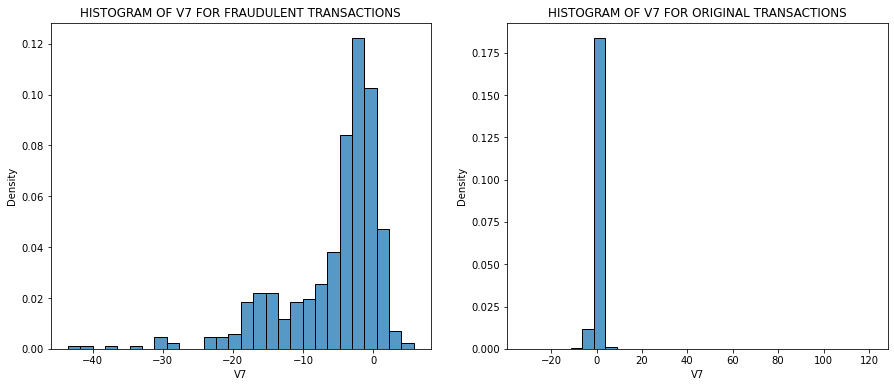

In [25]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V7',data=fr,stat='density',ax=ax1)
sns.histplot(x='V7',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V7 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V7 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V7))
print('Skewness  for original transactions:',stats.skew(real.V7))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V7))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V7))


Text(0.5, 1.0, 'BOXPLOT OF V7 W.R.T. CLASS')

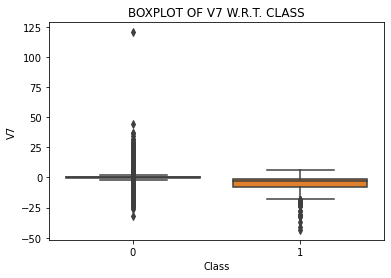

In [26]:
p1=sns.boxplot(x='Class',y='V7',data=file)
p1.set_title('BOXPLOT OF V7 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V7 takes values from -40 to 3 for class 1 and takes values around 0 for class 0
   2. V7 has higher variance for class 1 than for class 0
   3. V7 is more peaked for class 0 than for class 1 .V7 is negatively skewed for class 1 and positively skewed for class 0.
   4. V7 has more outlier values for class 0 than class 1.

#### 9TH COLUMN:V8

Skewness for fraudulent transactions: -2.8213861475153714
Skewness  for original transactions: -8.39544756702681
Kurtosis  for fraudulent transactions: 16.582683720949465
Kurtosis  for original transactions: 209.76895163286238


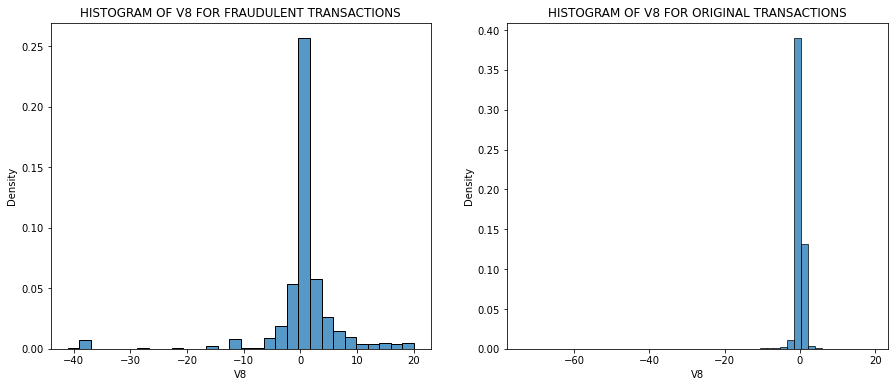

In [27]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V8',data=fr,stat='density',bins=30,ax=ax1)
sns.histplot(x='V8',data=real,stat='density',bins=50,ax=ax2)
ax1.set_title('HISTOGRAM OF V8 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V8 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V8))
print('Skewness  for original transactions:',stats.skew(real.V8))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V8))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V8))


Text(0.5, 1.0, 'BOXPLOT OF V8 W.R.T. CLASS')

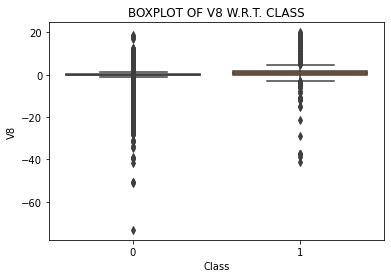

In [28]:
p1=sns.boxplot(x='Class',y='V8',data=file)
p1.set_title('BOXPLOT OF V8 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V8 takes values from -40 to 20 for class 1 and takes values around 0 for class 0
   2. V8 has higher variance for class 1 than for class 0
   3. V8 is more peaked and more negatively skewed for class 0 than for class 1 .
   4. V8 has more outlier values for class 0 than class 1.

#### 10TH COLUMN:V9

Skewness for fraudulent transactions: -0.9720995887842262
Skewness  for original transactions: 0.6656316615954238
Kurtosis  for fraudulent transactions: 1.4675677368034838
Kurtosis  for original transactions: 3.196769265402528


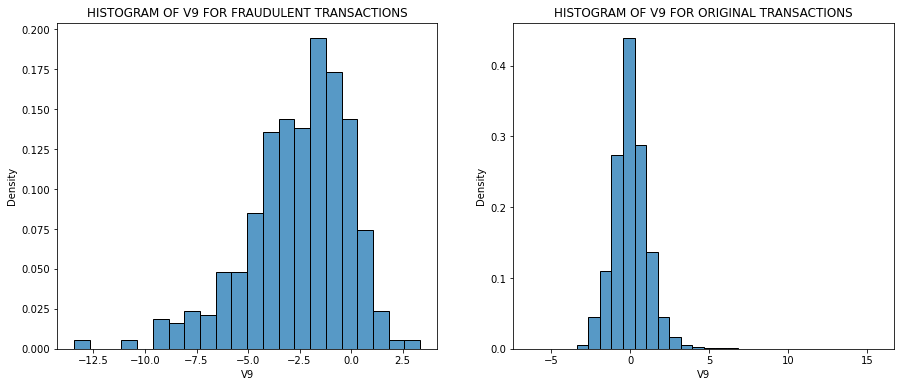

In [29]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V9',data=fr,stat='density',ax=ax1)
sns.histplot(x='V9',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V9 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V9 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V9))
print('Skewness  for original transactions:',stats.skew(real.V9))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V9))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V9))


Text(0.5, 1.0, 'BOXPLOT OF V9 W.R.T. CLASS')

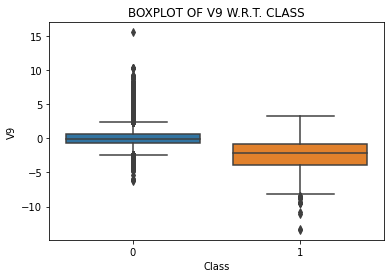

In [30]:
p1=sns.boxplot(x='Class',y='V9',data=file)
p1.set_title('BOXPLOT OF V9 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V9 takes values from -13 to 3 for class 1 and takes values from -3 to 5 for class 0
   2. V9 has higher variance for class 1 than for class 0
   3. V9 is more peaked for class 0 than for class 1 . The skewness is is slightly negative for class 1 and slightly positive for class 0.
   4. V9 has more outlier values for class 0 than class 1.

#### 11TH COLUMN:V10

Skewness for fraudulent transactions: -1.149201886781501
Skewness  for original transactions: 2.4222650778369115
Kurtosis  for fraudulent transactions: 1.4232998665367997
Kurtosis  for original transactions: 21.96156268796781


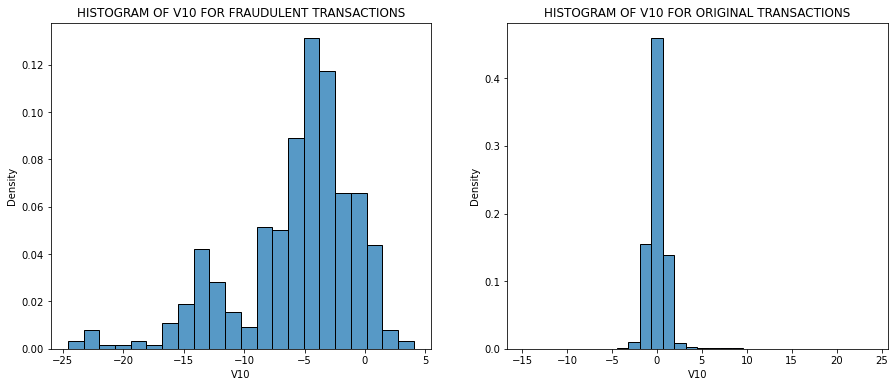

In [31]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V10',data=fr,stat='density',ax=ax1)
sns.histplot(x='V10',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V10 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V10 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V10))
print('Skewness  for original transactions:',stats.skew(real.V10))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V10))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V10))


Text(0.5, 1.0, 'BOXPLOT OF V10 W.R.T. CLASS')

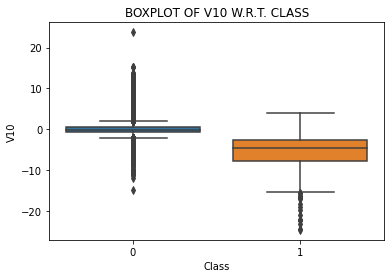

In [32]:
p1=sns.boxplot(x='Class',y='V10',data=file)
p1.set_title('BOXPLOT OF V10 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V10 takes values from -25 to 5 for class 1 and takes values around 0 for class 0
   2. V10 has higher variance for class 1 than for class 0
   3. V10 is more peaked for class 0 than for class 1 . The skewness is negative for class 1 and positive for class 0.
   4. V10 has more outlier values for class 0 than class 1.

#### 12TH COLUMN:V11

Skewness for fraudulent transactions: 0.4975666341375601
Skewness  for original transactions: 0.14553579943258851
Kurtosis  for fraudulent transactions: 0.19312485921516576
Kurtosis  for original transactions: 0.03561911242079896


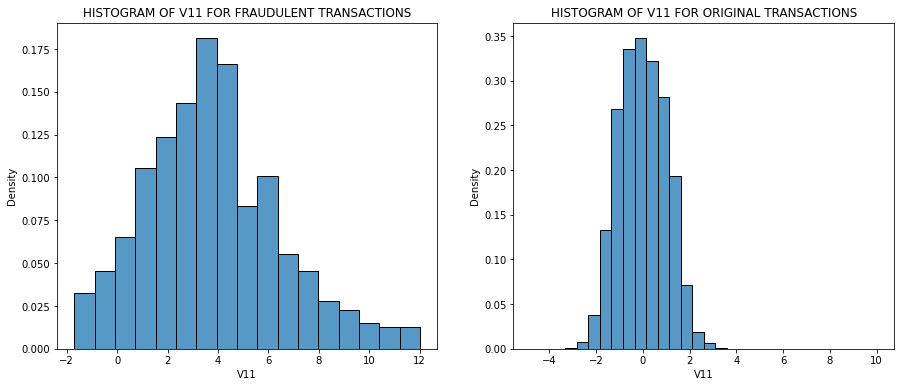

In [33]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V11',data=fr,stat='density',ax=ax1)
sns.histplot(x='V11',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V11 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V11 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V11))
print('Skewness  for original transactions:',stats.skew(real.V11))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V11))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V11))


Text(0.5, 1.0, 'BOXPLOT OF V11 W.R.T. CLASS')

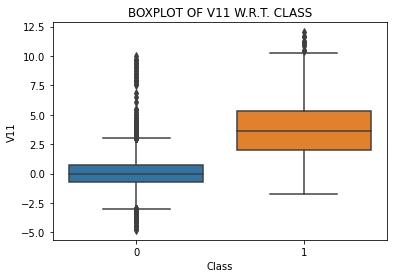

In [34]:
p1=sns.boxplot(x='Class',y='V11',data=file)
p1.set_title('BOXPLOT OF V11 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V11 takes values from -2 to 12 for class 1 and takes most of the values from -3 to 3 for class 0
   2. V11 has higher variance for class 1 than for class 0
   3. V11 is almost symmetric and mesokurtic.
   4. V11 has more outlier values for class 0 than class 1.

#### 13TH COLUMN:V12

Skewness for fraudulent transactions: -0.6647948022687559
Skewness  for original transactions: -1.2562944127329285
Kurtosis  for fraudulent transactions: -0.20637605970179562
Kurtosis  for original transactions: 5.300779480214736


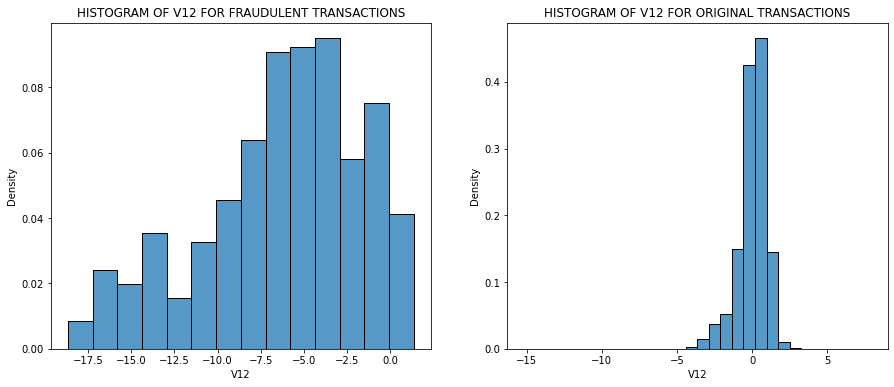

In [35]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V12',data=fr,stat='density',ax=ax1)
sns.histplot(x='V12',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V12 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V12 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V12))
print('Skewness  for original transactions:',stats.skew(real.V12))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V12))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V12))


Text(0.5, 1.0, 'BOXPLOT OF V12 W.R.T. CLASS')

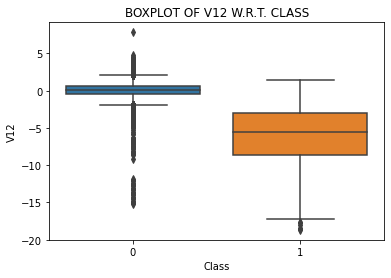

In [36]:
p1=sns.boxplot(x='Class',y='V12',data=file)
p1.set_title('BOXPLOT OF V12 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V12 takes values from -18 to 1 for class 1 and takes most of the values around 0 for class 0
   2. V12 has higher variance for class 1 than for class 0
   3. V12 is more peaked and more negatively skewed for class 0 than for class 1 
   4. V12 has more outlier values for class 0 than class 1.

#### 14TH COLUMN:V13

Skewness for fraudulent transactions: -0.02591639170273846
Skewness  for original transactions: 0.06558132884618773
Kurtosis  for fraudulent transactions: -0.4417739384372874
Kurtosis  for original transactions: 0.19655348524223282


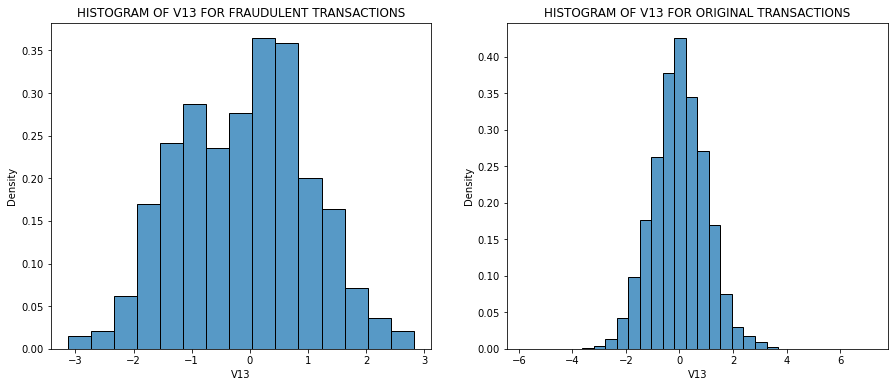

In [37]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V13',data=fr,stat='density',ax=ax1)
sns.histplot(x='V13',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V13 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V13 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V13))
print('Skewness  for original transactions:',stats.skew(real.V13))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V13))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V13))


Text(0.5, 1.0, 'BOXPLOT OF V13 W.R.T. CLASS')

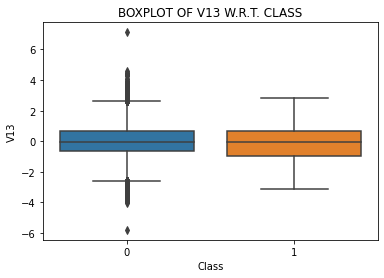

In [38]:
p1=sns.boxplot(x='Class',y='V13',data=file)
p1.set_title('BOXPLOT OF V13 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V13 takes values from -3 to 3 for class 1 and takes most of the values from -4 to 4 for class 0
   2. V13 has higher variance for class 1 than for class 0
   3. V13 is more peaked for class 0 than for class 1 . The skewness is is almost symmetric for both classes.
   4. V13 has outlier values for class 0 only.

#### 15TH COLUMN:V14

Skewness for fraudulent transactions: -0.2507860694845321
Skewness  for original transactions: -0.7038533745225957
Kurtosis  for fraudulent transactions: -0.29144695383917885
Kurtosis  for original transactions: 7.719322966182563


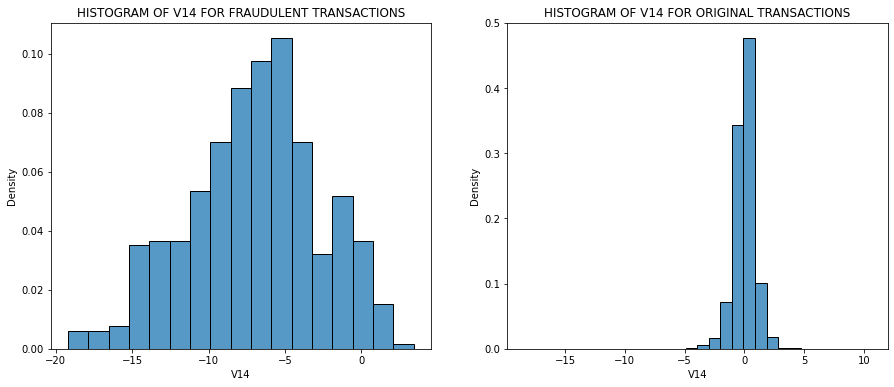

In [39]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V14',data=fr,stat='density',ax=ax1)
sns.histplot(x='V14',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V14 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V14 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V14))
print('Skewness  for original transactions:',stats.skew(real.V14))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V14))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V14))


Text(0.5, 1.0, 'BOXPLOT OF V14 W.R.T. CLASS')

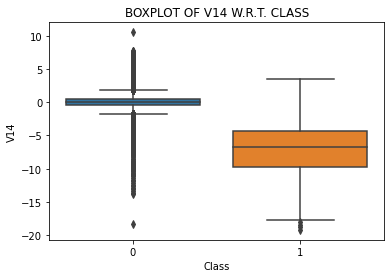

In [40]:
p1=sns.boxplot(x='Class',y='V14',data=file)
p1.set_title('BOXPLOT OF V14 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V14 takes values from -20 to 5 for class 1 and takes most of the values around 0 for class 0
   2. V14 has higher variance for class 1 than for class 0
   3. V14 is more peaked and more negatively skewed for class 0 than for class 1 . 
   4. V14 has more outlier values for class 0 than class 1.

#### 16TH COLUMN:V15

Skewness for fraudulent transactions: -0.5334337155360666
Skewness  for original transactions: -0.30765727535821413
Kurtosis  for fraudulent transactions: 0.6423935589981422
Kurtosis  for original transactions: 0.2827440708231226


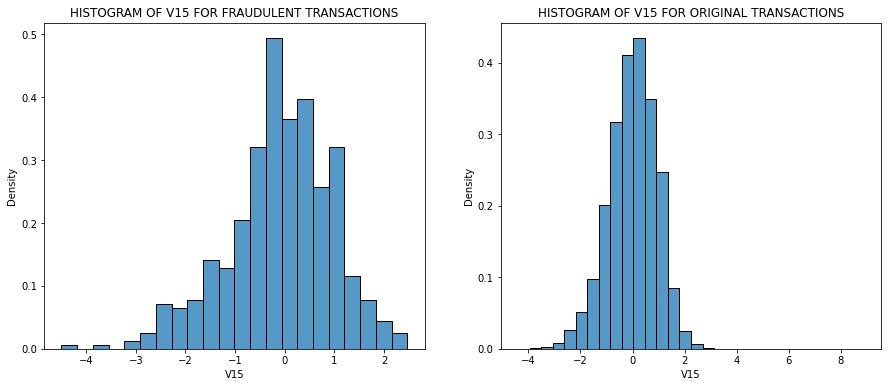

In [41]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V15',data=fr,stat='density',ax=ax1)
sns.histplot(x='V15',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V15 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V15 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V15))
print('Skewness  for original transactions:',stats.skew(real.V15))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V15))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V15))


Text(0.5, 1.0, 'BOXPLOT OF V15 W.R.T. CLASS')

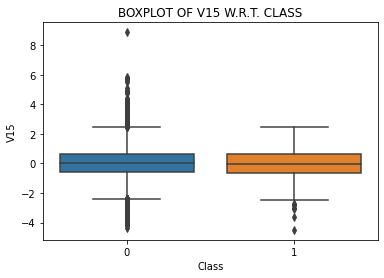

In [42]:
p1=sns.boxplot(x='Class',y='V15',data=file)
p1.set_title('BOXPLOT OF V15 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V15 takes values from -4 to 3 for class 1 and for class 0
   2. V15 has higher variance for class 1 than for class 0
   3. V15 is more peaked and more negatively skewed for class 1 than for class 0 . .
   4. V15 has more outlier values for class 0 than class 1.

#### 17TH COLUMN:V16

Skewness for fraudulent transactions: -0.49375144672458826
Skewness  for original transactions: -0.43952071472687276
Kurtosis  for fraudulent transactions: -0.45573405692959845
Kurtosis  for original transactions: 2.847166286301645


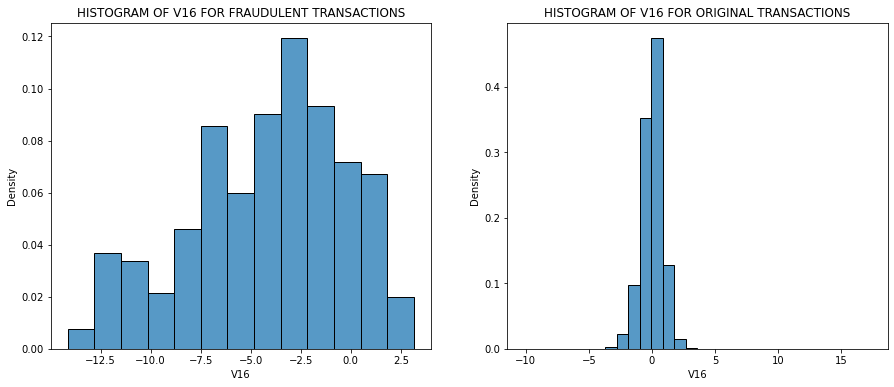

In [43]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V16',data=fr,stat='density',ax=ax1)
sns.histplot(x='V16',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V16 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V16 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V16))
print('Skewness  for original transactions:',stats.skew(real.V16))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V16))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V16))


Text(0.5, 1.0, 'BOXPLOT OF V16 W.R.T. CLASS')

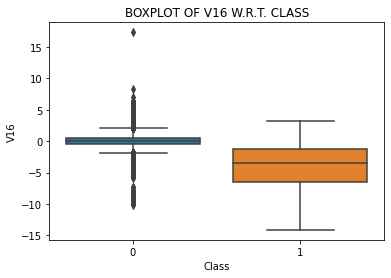

In [44]:
p1=sns.boxplot(x='Class',y='V16',data=file)
p1.set_title('BOXPLOT OF V16 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V16 takes values from -13 to 3 for class 1 and takes values around 0 for class 0
   2. V16 has higher variance for class 1 than for class 0
   3. V16 is more peaked for class 0 than for class 1 . The skewness is negative and almost same for both classes.
   4. V16 has more outlier values for class 0 only.

#### 18TH COLUMN:V17

Skewness for fraudulent transactions: -0.4846120535095738
Skewness  for original transactions: 0.224526633661368
Kurtosis  for fraudulent transactions: -0.452989730928286
Kurtosis  for original transactions: 20.05496946170267


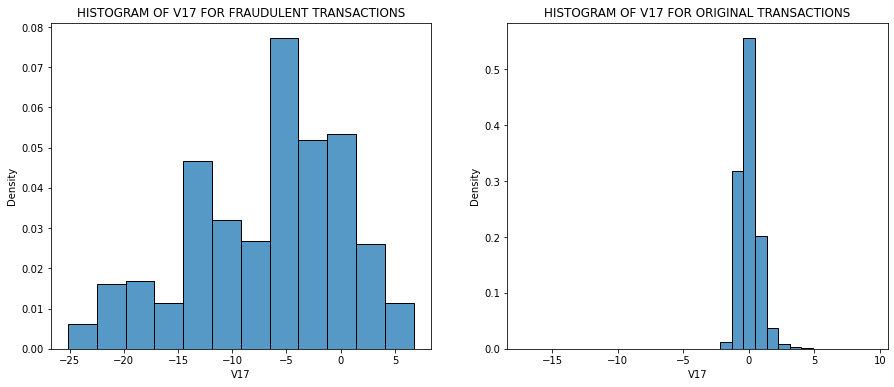

In [45]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V17',data=fr,stat='density',ax=ax1)
sns.histplot(x='V17',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V17 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V17 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V17))
print('Skewness  for original transactions:',stats.skew(real.V17))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V17))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V17))


Text(0.5, 1.0, 'BOXPLOT OF V17 W.R.T. CLASS')

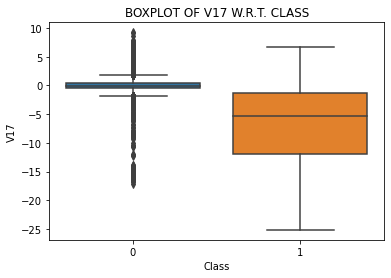

In [46]:
p1=sns.boxplot(x='Class',y='V17',data=file)
p1.set_title('BOXPLOT OF V17 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V17 takes values from -25 to 7.5 for class 1 and takes values around 0 for class 0
   2. V17 has higher variance for class 1 than for class 0
   3. V17 is more peaked for class 0 than for class 1 . V17 is slightly positively skewed for class 0 and slightly negatively skewed for class 1.
   4. V17 has  outlier values for class 0 only.

#### 19TH COLUMN:V18

Skewness for fraudulent transactions: -0.5091262074788608
Skewness  for original transactions: -0.03986147234970411
Kurtosis  for fraudulent transactions: -0.5211632362003833
Kurtosis  for original transactions: 0.8448704580429753


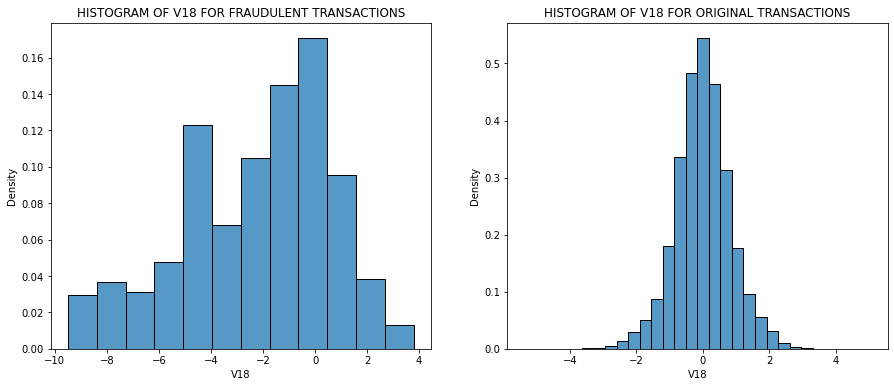

In [47]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V18',data=fr,stat='density',ax=ax1)
sns.histplot(x='V18',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V18 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V18 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V18))
print('Skewness  for original transactions:',stats.skew(real.V18))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V18))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V18))


Text(0.5, 1.0, 'BOXPLOT OF V18 W.R.T. CLASS')

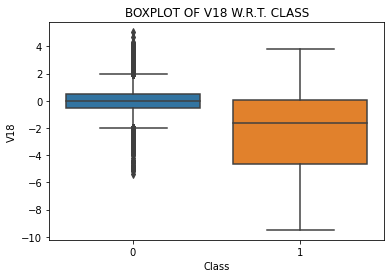

In [48]:
p1=sns.boxplot(x='Class',y='V18',data=file)
p1.set_title('BOXPLOT OF V18 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V18 takes values from -10 to 4 for class 1 and takes values from -3 to 3 for class 0
   2. V18 has higher variance for class 1 than for class 0
   3. V18 is more peaked for class 0 than for class 1 .V18 is slightly negatively skewed for class 1 and almost symmetric for class 0.
   4. V18 has  outlier values for class 0 only.

#### 20TH COLUMN:V19

Skewness for fraudulent transactions: 0.04511041548359373
Skewness  for original transactions: 0.09748373284591179
Kurtosis  for fraudulent transactions: -0.19930365919826043
Kurtosis  for original transactions: 1.696330887284211


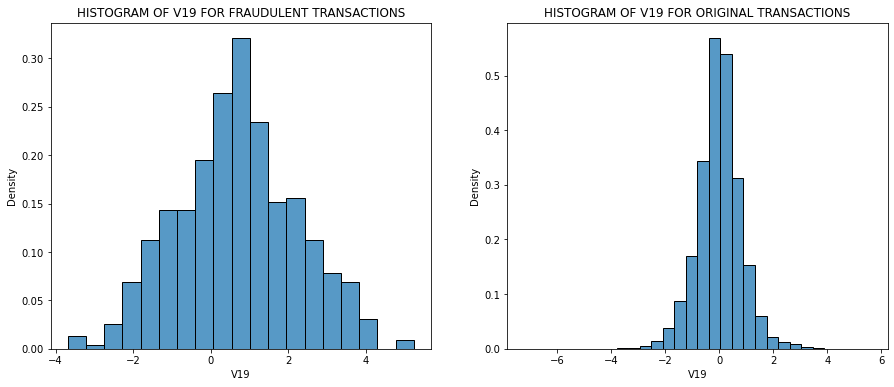

In [49]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V19',data=fr,stat='density',ax=ax1)
sns.histplot(x='V19',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V19 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V19 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V19))
print('Skewness  for original transactions:',stats.skew(real.V19))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V19))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V19))


Text(0.5, 1.0, 'BOXPLOT OF V19 W.R.T. CLASS')

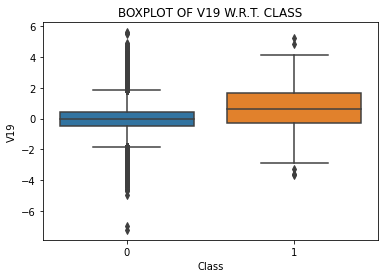

In [50]:
p1=sns.boxplot(x='Class',y='V19',data=file)
p1.set_title('BOXPLOT OF V19 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V19 takes values from -3 to 4 for class 1 and takes values from -3 to 3 for class 0.
   2. V19 has higher variance for class 1 than for class 0.
   3. V19 is more peaked for class 0 than for class 1 . V19 is almost symmetric for both classes.
   4. V19 has more outlier values for class 0 than class 1.

#### 21ST COLUMN:V20

Skewness for fraudulent transactions: 2.1555955498528854
Skewness  for original transactions: -2.0781023348065326
Kurtosis  for fraudulent transactions: 16.540987576679267
Kurtosis  for original transactions: 273.29396867512986


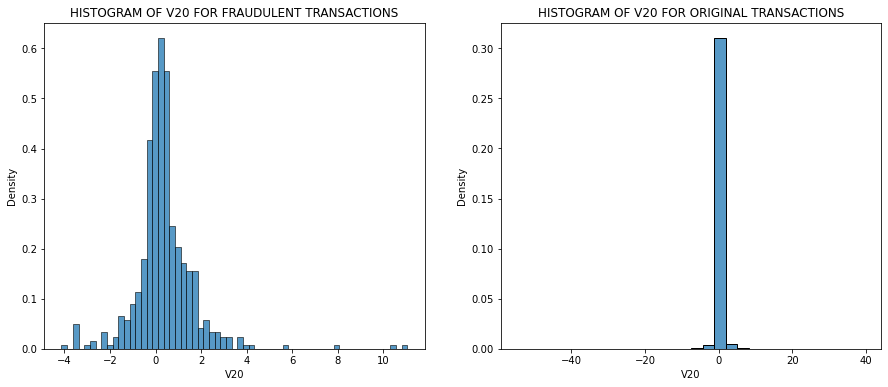

In [51]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V20',data=fr,stat='density',ax=ax1)
sns.histplot(x='V20',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V20 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V20 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V20))
print('Skewness  for original transactions:',stats.skew(real.V20))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V20))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V20))


Text(0.5, 1.0, 'BOXPLOT OF V20 W.R.T. CLASS')

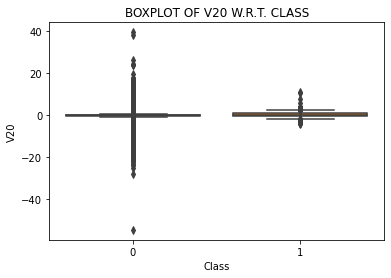

In [52]:
p1=sns.boxplot(x='Class',y='V20',data=file)
p1.set_title('BOXPLOT OF V20 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V20 takes values from -4 to 4 for class 1 and takes values around 0 for class 0
   2. V20 has higher variance for class 1 than for class 0
   3. V20 is more peaked for class 0 than for class 1 . The skewness of V20 is negative for class 0 and positive for class 1 
   4. V20 has more outlier values for class 0 than class 1.

#### 22ND COLUMN:V21

Skewness for fraudulent transactions: 2.6445219536222577
Skewness  for original transactions: 3.009097443380898
Kurtosis  for fraudulent transactions: 30.743473558902537
Kurtosis  for original transactions: 176.80839636587083


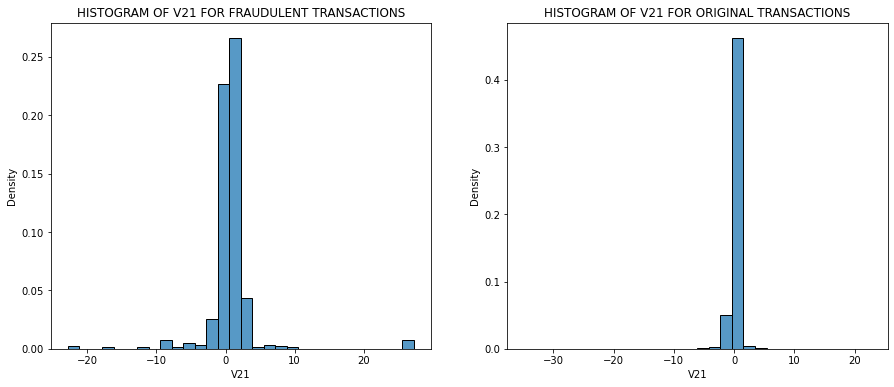

In [53]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V21',data=fr,bins=30,stat='density',ax=ax1)
sns.histplot(x='V21',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V21 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V21 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V21))
print('Skewness  for original transactions:',stats.skew(real.V21))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V21))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V21))


Text(0.5, 1.0, 'BOXPLOT OF V21 W.R.T. CLASS')

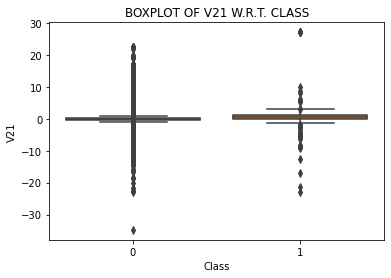

In [54]:
p1=sns.boxplot(x='Class',y='V21',data=file)
p1.set_title('BOXPLOT OF V21 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V21 takes values from -10 to 10 for class 1 and takes values around 0 for class 0.
   2. V21 has higher variance for class 1 than for class 0.
   3. V21 is more peaked and more positively skewed for class 0 than for class 1 .
   4. V21 has more outlier values for class 0 than class 1.

#### 23RD COLUMN:V22

Skewness for fraudulent transactions: -1.4955452808570437
Skewness  for original transactions: -0.19302938366849454
Kurtosis  for fraudulent transactions: 17.9832560794088
Kurtosis  for original transactions: 2.252664925012655


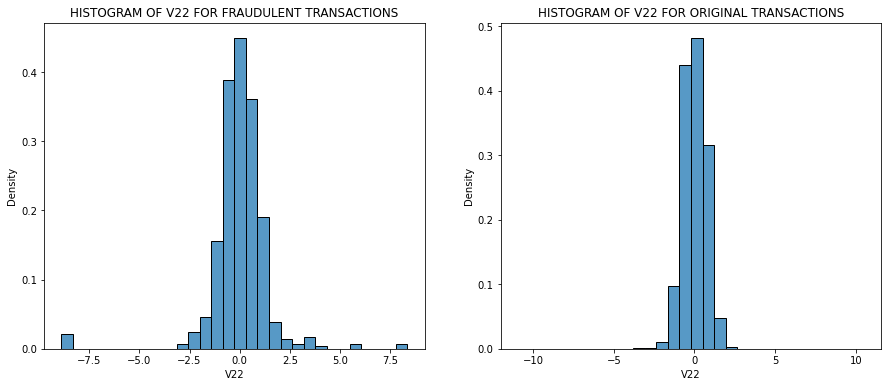

In [55]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V22',data=fr,bins=30,stat='density',ax=ax1)
sns.histplot(x='V22',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V22 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V22 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V22))
print('Skewness  for original transactions:',stats.skew(real.V22))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V22))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V22))


Text(0.5, 1.0, 'BOXPLOT OF V22 W.R.T. CLASS')

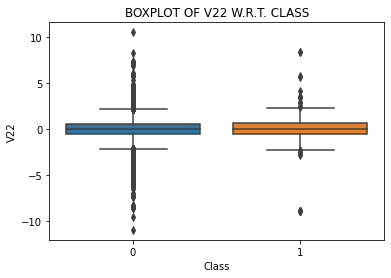

In [56]:
p1=sns.boxplot(x='Class',y='V22',data=file)
p1.set_title('BOXPLOT OF V22 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V22 takes values from -2.5 to 5 for class 1 and takes values around 0 for class 0
   2. V22 has higher variance for class 1 than for class 0
   3. V22 is more peaked and more negatively skewed for class 1 than for class 0 . 
   4. V22 has more outlier values for class 0 than class 1.

#### 24TH COLUMN:V23

Skewness for fraudulent transactions: -5.373741426798324
Skewness  for original transactions: -5.814565111475744
Kurtosis  for fraudulent transactions: 66.13402276653412
Kurtosis  for original transactions: 444.2367130978412


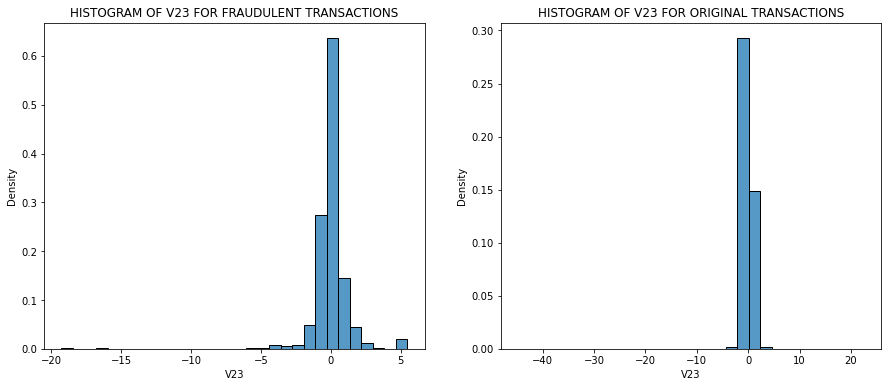

In [57]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V23',data=fr,stat='density',bins=30,ax=ax1)
sns.histplot(x='V23',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V23 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V23 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V23))
print('Skewness  for original transactions:',stats.skew(real.V23))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V23))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V23))


Text(0.5, 1.0, 'BOXPLOT OF V23 W.R.T. CLASS')

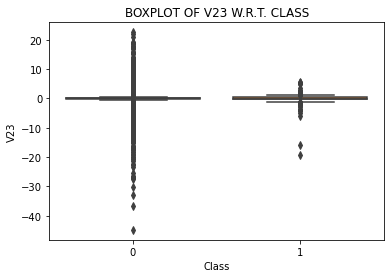

In [58]:
p1=sns.boxplot(x='Class',y='V23',data=file)
p1.set_title('BOXPLOT OF V23 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V23 takes values from -5 to 5 for class 1 and takes values around 0 for class 0
   2. V23 has higher variance for class 1 than for class 0
   3. V23 is more peaked for class 0 than for class 1 . The skewness is negative and almost same for both classes.
   4. V23 has more outlier values for class 0 than class 1.

#### 25TH COLUMN:V24

Skewness for fraudulent transactions: -0.44951774248082155
Skewness  for original transactions: -0.5528608799277098
Kurtosis  for fraudulent transactions: 0.07593973729319003
Kurtosis  for original transactions: 0.619331583798373


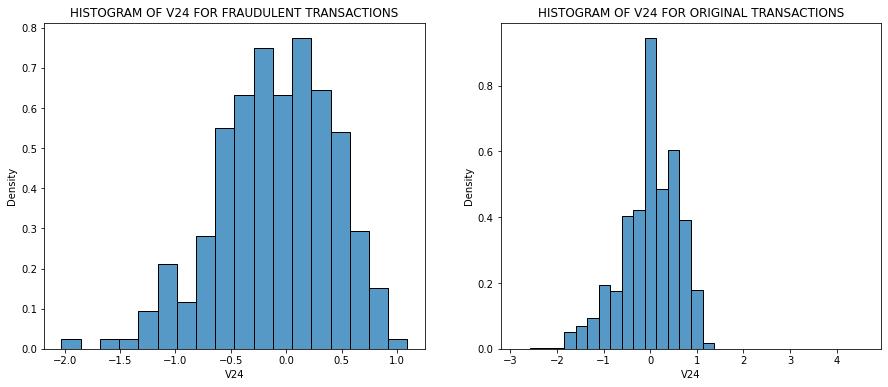

In [59]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V24',data=fr,stat='density',ax=ax1)
sns.histplot(x='V24',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V24 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V24 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V24))
print('Skewness  for original transactions:',stats.skew(real.V24))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V24))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V24))


Text(0.5, 1.0, 'BOXPLOT OF V24 W.R.T. CLASS')

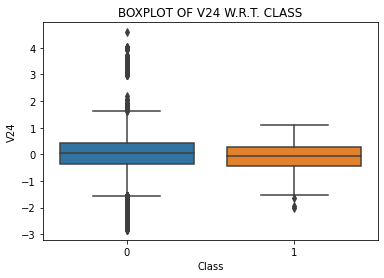

In [60]:
p1=sns.boxplot(x='Class',y='V24',data=file)
p1.set_title('BOXPLOT OF V24 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V24 takes values from -2 to 1 for class 1 and takes values from -2 to 2 for class 0
   2. V24 has higher variance for class 1 than for class 0
   3. V24 is more peaked for class 0 than for class 1 . The skewness is negative and almost same for both classes.
   4. V24 has more outlier values for class 0 than class 1.

#### 26TH COLUMN:V25

Skewness for fraudulent transactions: -0.780422040749251
Skewness  for original transactions: -0.4136851251021109
Kurtosis  for fraudulent transactions: 3.6579942362595945
Kurtosis  for original transactions: 4.275024733971816


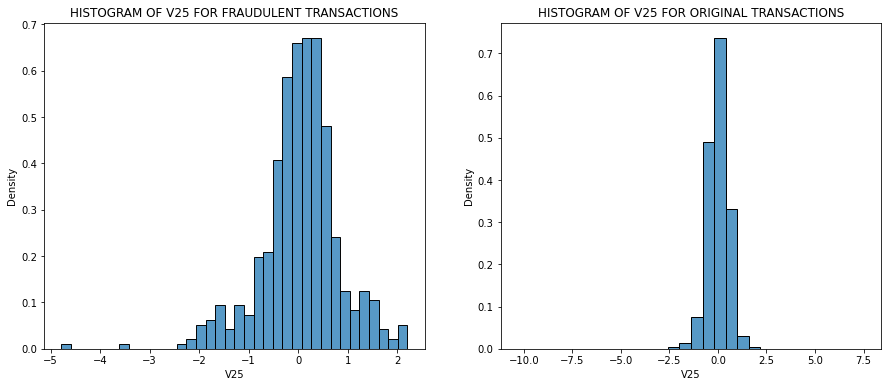

In [61]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V25',data=fr,stat='density',ax=ax1)
sns.histplot(x='V25',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V25 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V25 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V25))
print('Skewness  for original transactions:',stats.skew(real.V25))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V25))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V25))


Text(0.5, 1.0, 'BOXPLOT OF V25 W.R.T. CLASS')

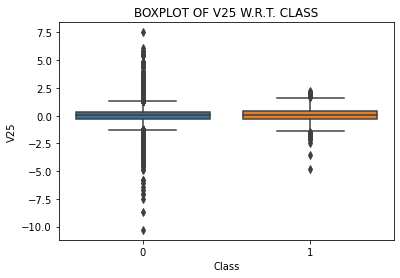

In [62]:
p1=sns.boxplot(x='Class',y='V25',data=file)
p1.set_title('BOXPLOT OF V25 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V25 takes values from -5 to 2 for class 1 and takes values around 0 for class 0
   2. V25 has higher variance for class 1 than for class 0
   3. V25 is more peaked for class 0 than for class 1 . V25 is more negatively skewed for class 1 than for class 0.
   4. V25 has more outlier values for class 0 than class 1.

#### 27TH COLUMN:V26

Skewness for fraudulent transactions: 0.5269227403849768
Skewness  for original transactions: 0.5768093896856605
Kurtosis  for fraudulent transactions: 1.9508941552736285
Kurtosis  for original transactions: 0.9174318838416409


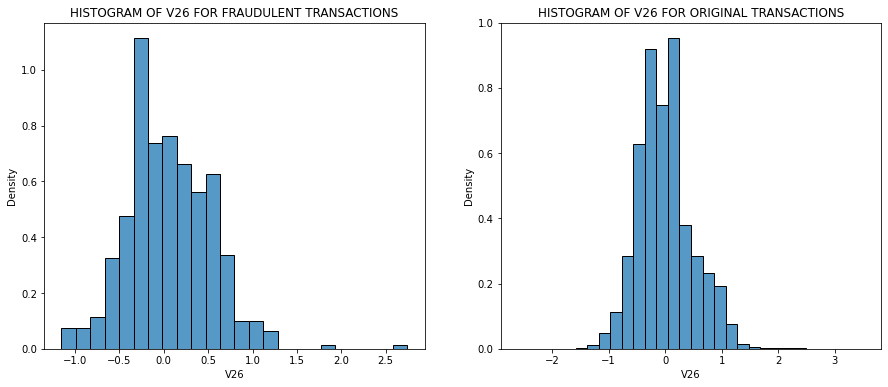

In [63]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V26',data=fr,stat='density',ax=ax1)
sns.histplot(x='V26',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V26 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V26 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V26))
print('Skewness  for original transactions:',stats.skew(real.V26))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V26))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V26))


Text(0.5, 1.0, 'BOXPLOT OF V26 W.R.T. CLASS')

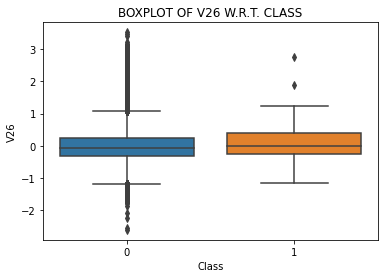

In [64]:
p1=sns.boxplot(x='Class',y='V26',data=file)
p1.set_title('BOXPLOT OF V26 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V26 takes values from -1 to 1.5 for class 1 and takes values from -1.5 to 1.5 for class 0
   2. V26 has higher variance for class 1 than for class 0
   3. The kurtosis and skewness of V26 almost same for both classes
   4. V26 has more outlier values for class 0 than class 1.

#### 28TH COLUMN:V27

Skewness for fraudulent transactions: -2.253703846702057
Skewness  for original transactions: -1.0712423854746262
Kurtosis  for fraudulent transactions: 8.026884640992566
Kurtosis  for original transactions: 252.53097064484294


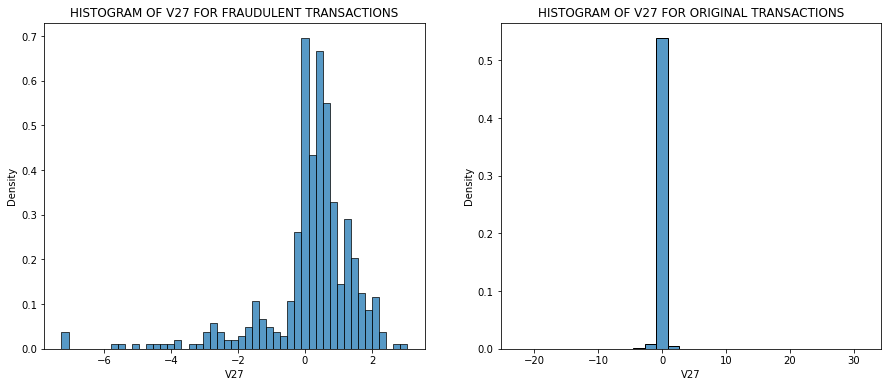

In [65]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V27',data=fr,stat='density',ax=ax1)
sns.histplot(x='V27',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V27 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V27 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V27))
print('Skewness  for original transactions:',stats.skew(real.V27))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V27))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V27))


Text(0.5, 1.0, 'BOXPLOT OF V27 W.R.T. CLASS')

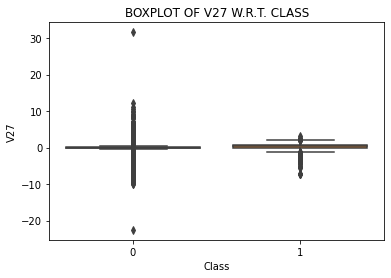

In [66]:
p1=sns.boxplot(x='Class',y='V27',data=file)
p1.set_title('BOXPLOT OF V27 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. V27 takes values from -6 to 2 for class 1 and takes values around 0 for class 0
   2. V27 has higher variance for class 1 than for class 0
   3. V27 is more peaked for class 0 than for class 1 but more negatively skewed for class 1 than for class 0
   4. V27 has more outlier values for class 0 than class 1.

#### 29TH COLUMN:V28

Skewness for fraudulent transactions: -0.7128654110320044
Skewness  for original transactions: 11.267397437888748
Kurtosis  for fraudulent transactions: 1.4643151189754784
Kurtosis  for original transactions: 940.8228477309209


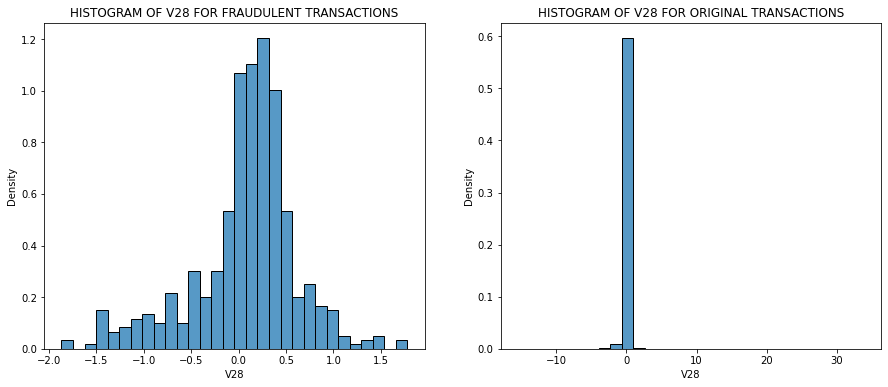

In [67]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='V28',data=fr,stat='density',ax=ax1)
sns.histplot(x='V28',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF V28 FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF V28 FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.V28))
print('Skewness  for original transactions:',stats.skew(real.V28))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.V28))
print('Kurtosis  for original transactions:',stats.kurtosis(real.V28))


Text(0.5, 1.0, 'BOXPLOT OF V28 W.R.T. CLASS')

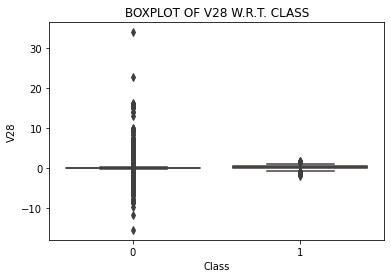

In [68]:
p1=sns.boxplot(x='Class',y='V28',data=file)
p1.set_title('BOXPLOT OF V28 W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that <br>
   1. V29 takes values from -2 to 1.5 for class 1 and takes values around 0 for class 0
   2. V29 has higher variance for class 1 than for class 0
   3. V29 is more peaked for class 0 than for class 1 . V29 is highly positively skewed for class 0 whereas it is slightly negatively skewed for class 1.
   4. V29 has more outlier values for class 0 than class 1.

#### 30TH COLUMN:Amount

Skewness for fraudulent transactions: 3.743020244873463
Skewness  for original transactions: 17.00305739508626
Kurtosis  for fraudulent transactions: 17.553687045011362
Kurtosis  for original transactions: 846.722084122974


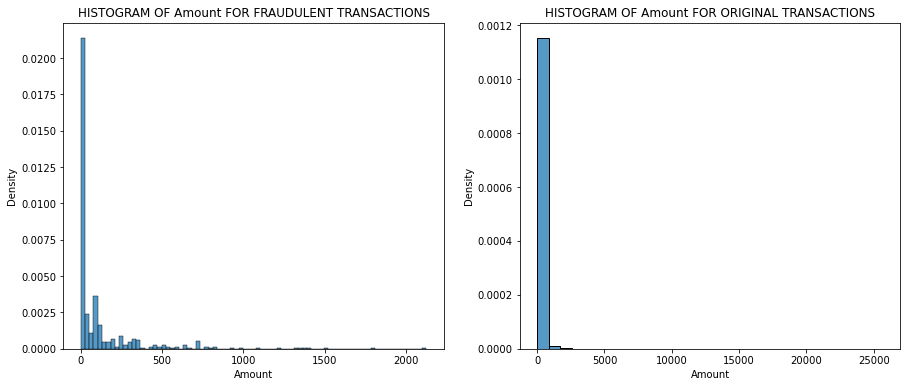

In [69]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='Amount',data=fr,stat='density',ax=ax1)
sns.histplot(x='Amount',data=real,stat='density',bins=30,ax=ax2)
ax1.set_title('HISTOGRAM OF Amount FOR FRAUDULENT TRANSACTIONS')
ax2.set_title('HISTOGRAM OF Amount FOR ORIGINAL TRANSACTIONS')
print('Skewness for fraudulent transactions:',stats.skew(fr.Amount))
print('Skewness  for original transactions:',stats.skew(real.Amount))
print('Kurtosis  for fraudulent transactions:',stats.kurtosis(fr.Amount))
print('Kurtosis  for original transactions:',stats.kurtosis(real.Amount))


Text(0.5, 1.0, 'BOXPLOT OF Amount W.R.T. CLASS')

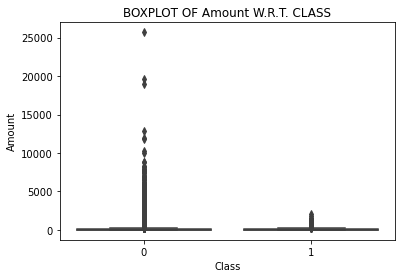

In [70]:
p1=sns.boxplot(x='Class',y='Amount',data=file)
p1.set_title('BOXPLOT OF Amount W.R.T. CLASS')

<font color=brown>**INTERPRETATION:**</font> From the above diagrams, It can be concluded that 
   1. Amount takes most of the values around 0 for class 0 and class 1.
   2. Amount has higher variance for class 1 than for class 0.
   3. Amount is more peaked and more positively skewed for class 0 than for class 1 . 
   4. Amount has more outlier values for class 0 than class 1.

#### 31ST COLUMN: CLASS
**Class is a categorical variable taking 2 values 0 and 1.**
**In this dataset Class=0 means <font color=blue>Original Transactions</font> and Class=1 means <font color=blue>Fraudulent Transactions</font>** 


 * <font>**BARPLOT**</font>

Text(0.5, 1.0, 'Barplot of frequency of classes')

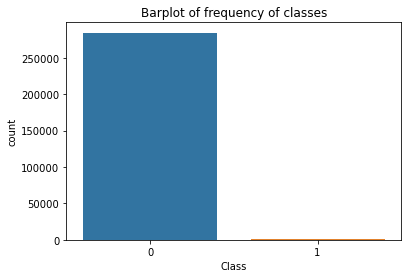

In [71]:
p1=sns.countplot(x='Class',data=file)
p1.set_title('Barplot of frequency of classes')

In [72]:
n=len(file['Class'])
fr=(file[file['Class']==1])
real=(file[file['Class']==0])
print('Total no. of Original Transaction:',len(real))
print('Total no. of Fraudulent Transaction:',len(fr))
print('Percentage of Fradulent Transaction:',len(fr)/n)

Total no. of Original Transaction: 284315
Total no. of Fraudulent Transaction: 492
Percentage of Fradulent Transaction: 0.001727485630620034


 <font color=brown>**COMMENT:**</font> <font>*From the above diagram & results obtained from the dataset,we can observe that only 0.17% are the fraudulent transactions out of all transactions. So,it seems that there's very rare case of fraudulent transactions. Clearly, the data is <font color=blue>imbalance.</font>*</font> 

*  **Summary of the amount details w.r.t. different classes**

In [73]:
print('Summary of the Amount details of the Fraudulent Transaction')
fr['Amount'].describe()

Summary of the Amount details of the Fraudulent Transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [74]:
print('Summary of the Amount details of the Original Transaction')
real['Amount'].describe()

Summary of the Amount details of the Original Transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### DATA NORMALISATION
* <font>*In the previous section, we can observe that most of the columns are skewed. This can deviate our result. So, we need to normalise the dataset.*</font>
* <font>*Here, I'll use Z-score normalisation method. In this method, the following transformation is used:*</font>
$ z=(x-\mu)/\sigma $ <br>
where z is the standard value, x is the original value $\mu$ is the mean of the original value and $\sigma$ is the standard deviation of the original value.

In [75]:
scaler=StandardScaler()
df=pd.DataFrame(scaler.fit_transform(file),columns=file.columns)
df=df.drop('Class',axis=1)
df_norm=pd.concat([df,file['Class']],axis=1)

In [76]:
df_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


### DATA BALANCING
<font> *Since, the dataset is totally imbalanced, we need to balance it properly for further analysis. There are 3 main methods for balancing.*</font>
    
    1. Oversampling
    2. Undersampling
    3. Smote
    
<font> *Here, I'll use SMOTE method for balancing.*</font>
*  **METHOD: SMOTE** <br> *Using this method, I'll perform data augmentation by creating synthetic data points of class 0 based on the original data points of class 0*

In [77]:
smt=SMOTE(sampling_strategy='not majority')

In [78]:
X1=df_norm.drop('Class',axis=1)
y1=df_norm.Class
X_smt,y_smt=smt.fit_resample(X1,y1)

In [79]:
y_smt.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

## Dimensionality Reduction of the dataset 

* In machine learning classification problems, there are often too many features on the basis of which the final classification is done. The higher the number of features, the harder it gets to visualize the training set and then work on it. Sometimes, most of these features are correlated, and hence redundant. This is where dimensionality reduction algorithms come into play. Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables. It can be divided into feature selection and feature extraction.

<font > *Here, I'll reduce the dimensionality of the dataset by <font color=blue>**Principal Component Analysis(PCA)**</font> Method*</font>

* **PRINCIPAL COMPONENT ANALYSIS(PCA)**

In [80]:
pca=PCA(0.95)
X_pca=pca.fit_transform(X_smt)

### TRAIN-TEST SPLIT

### a. Without Dimension Reduction

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X_smt,y_smt,test_size=0.3,stratify=y_smt,random_state=10)

### b. With Dimension Reduction

In [82]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_pca,y_smt,test_size=0.3,stratify=y_smt,random_state=10)

### APPLYING DIFFERENT ALGORITHMS OF MACHINE LEARNING
Here, I'll apply 3 different algorithms of machine learning on the train set.<br>
**i. Logistic Regression<br>
ii. Decision Tree<br>
iii. Random Forest**<br>
Every algorithm will be applied on two types of train set.<br>
**i. The train set without dimensionality reduction<br>
  ii. The train set with dimensionality reduction**<br>

Then I'll evaluate each model based on the following features:<br>
 **a. Confusion Matrix:** A confusion matrix presents a 2x2 table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes.<br>
 We can obtain four different combinations from the predicted and actual values of a classifier:
* True Positive(TP): The number of times our actual positive values are equal to the predicted positive. The (1,1)th element of confusion matrix represents this value.
* False Positive(FP): The number of times our model wrongly predicts negative values as positives.The (1,2)th element of confusion matrix represents this value.
* True Negative(TN): The number of times our actual negative values are equal to predicted negative values.The (2,1)th element of confusion matrix represents this value.
* False Negative(FN): The number of times our model wrongly predicts negative values as positives.The (2,2)th element of confusion matrix represents this value.

**b. Classification Report:** This contains the following important results:<br>
**i. Accuracy:** 
$accuracy=\frac{TP+TN}{TP+FP+TN+FN}$<br>
**ii. Precision:** 
$precision=\frac{TP}{TP+FP}$ <br>
**iii. Recall:** $recall=\frac{TP}{TP+FN}$<br>
**iv. F1-score:** $F1-score=\frac{2*precision*recall}{precision+recall}$

### 1. LOGISTIC REGRESSION

In [83]:
model=LogisticRegression()

### a. Without Dimension Reduction

In [84]:

model.fit(X_train,y_train)
y_pred=model.predict(X_test)

* <font size=4>**MODEL EVALUATION**</font>

#### (i) CONFUSION MATRIX

Text(15.0, 0.5, 'actual case')

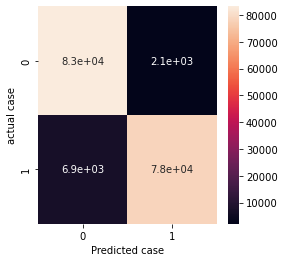

In [85]:
cm = confusion_matrix(y_test, y_pred)
cm
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted case')
plt.ylabel('actual case')

#### (ii) CLASSIFICATION REPORT

In [86]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85294
           1       0.97      0.92      0.95     85295

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



<font color =brown>**Comment:**</font> *Observing the confusion matrix and classification report,it can be concluded that the model is performing quite well on the test set.*

### a. With Dimension Reduction

In [87]:
model.fit(X_train_pca,y_train_pca)
y_pred_pca=model.predict(X_test_pca)

* <font size=4>**MODEL EVALUATION**</font>

#### (i) CONFUSION MATRIX

Text(15.0, 0.5, 'actual case')

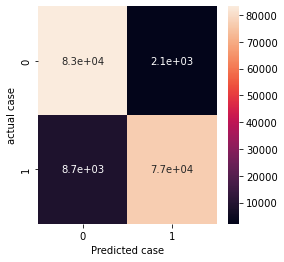

In [88]:
cm = confusion_matrix(y_test_pca, y_pred_pca)
cm
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted case')
plt.ylabel('actual case')

#### (ii) CLASSIFICATION REPORT

In [89]:
print(metrics.classification_report(y_test_pca,y_pred_pca))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     85294
           1       0.97      0.90      0.93     85295

    accuracy                           0.94    170589
   macro avg       0.94      0.94      0.94    170589
weighted avg       0.94      0.94      0.94    170589



<font color =brown>**Comment:**</font> *Observing the confusion matrix and classification report,it can be concluded that the model is performing quite well on the test set.*

### 2. DECISION TREE

In [90]:
DT = DecisionTreeClassifier()

### a. Without Dimension Reduction

In [91]:
DT.fit(X_train, y_train)
y_pred_dt=DT.predict(X_test)

* <font size=4>**MODEL EVALUATION**</font>

#### (i) CONFUSION MATRIX

Text(15.0, 0.5, 'actual case')

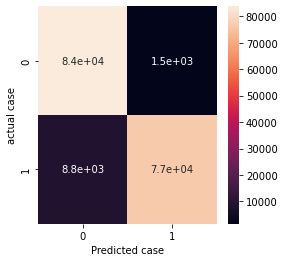

In [92]:
cm = confusion_matrix(y_test, y_pred_dt)
cm
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted case')
plt.ylabel('actual case')

#### (ii) CLASSIFICATION REPORT

In [93]:
print(metrics.classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     85294
           1       0.98      0.90      0.94     85295

    accuracy                           0.94    170589
   macro avg       0.94      0.94      0.94    170589
weighted avg       0.94      0.94      0.94    170589



<font color =brown>**Comment:**</font> *Observing the confusion matrix and classification report,it can be concluded that the model is performing quite well on the test set.*

### b. With Dimension Reduction

In [95]:
DT.fit(X_train_pca, y_train_pca)
y_pred_dt_pca=DT.predict(X_test_pca)

* <font size=4>**MODEL EVALUATION**</font>

#### (i) CONFUSION MATRIX

Text(15.0, 0.5, 'actual case')

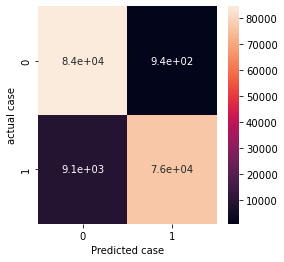

In [96]:
cm = confusion_matrix(y_test_pca, y_pred_dt_pca)
cm
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted case')
plt.ylabel('actual case')

#### (ii) CLASSIFICATION REPORT

In [97]:
print(metrics.classification_report(y_test_pca,y_pred_dt_pca))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     85294
           1       0.99      0.89      0.94     85295

    accuracy                           0.94    170589
   macro avg       0.95      0.94      0.94    170589
weighted avg       0.95      0.94      0.94    170589



<font color =brown>**Comment:**</font> *Observing the confusion matrix and classification report,it can be concluded that the model is performing quite well on the test set.*

### 3. RANDOM FOREST

In [98]:
rf = RandomForestClassifier()

### (i) Without Dimension Reduction

In [99]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

* <font size=4>**MODEL EVALUATION**</font>

#### a. CONFUSION MATRIX

Text(24.0, 0.5, 'actual case')

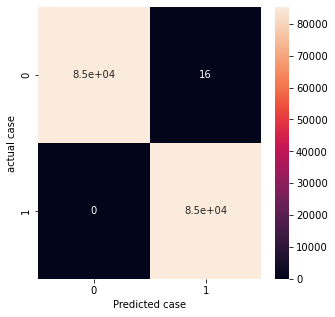

In [100]:
cm = confusion_matrix(y_test, y_pred_rf)
cm
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted case')
plt.ylabel('actual case')

#### b. CLASSIFICATION REPORT

In [101]:
print(metrics.classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       1.00      1.00      1.00     85295

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



<font color =brown>**Comment:**</font> *Observing the confusion matrix and classification report,it can be concluded that the model is performing extremely well on the test set.*

### (ii) With Dimension Reduction

In [102]:
rf.fit(X_train_pca, y_train_pca)
y_pred_rf_pca = rf.predict(X_test_pca)

* <font size=4>**MODEL EVALUATION**</font>

#### a. CONFUSION MATRIX

Text(24.0, 0.5, 'actual case')

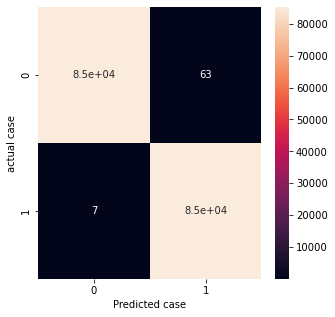

In [103]:
cm = confusion_matrix(y_test_pca, y_pred_rf_pca)
cm
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted case')
plt.ylabel('actual case')

#### b. CLASSIFICATION REPORT

In [104]:
print(metrics.classification_report(y_test_pca,y_pred_rf_pca))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       1.00      1.00      1.00     85295

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



<font color =brown>**Comment:**</font> *Observing the confusion matrix and classification report,it can be concluded that the model is performing extremely well on the test set.*

## SUMMARY
Performing appropriate methods and applying different algorithms of machine learning, we can conclude the followings:
* After visualizing the columns,it is found that most of the columns are skewed. The skewness is reduced by Z-score normalisation method. 
* By performing dimensionality reduction on the train set with the help of PCA, many redundant features are removed.
* After performing several models , I have seen that in the balanced dataset with SMOTE technique the Random Forest model has the best accuracy,precision,recall and F1-score. Hence, we can go with the Random Forest model here.